<a href="https://colab.research.google.com/github/mattcat1221/Project-4-/blob/main/Copy_of_Using_Kaggle_Models_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cleandirty-road-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2819333%2F4863251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240907%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240907T163419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc59f26b9a49c53f78ad82800bdac72b40616a0708cb10395e757dabb9bbc568b5e03794665cb534f2ad9c59ff483cd7361c09229c9f7a42f15fa90f65410f72c2c1fa69b8dbb02c1de8874141ea385fcaa80a7158d83a4bf05a18d59d0ee98f721b85fd6019d5d54284504421cc3b30dd5abbf3c9e5cd99b8ccf818eb1dab3d76dbf6c31d852d244f7864c4693510c5233742cce7961b41800a3e1462c1fe4ad6521ad4c1e664335891946b813f5bdfe01337870a3b3e02d02435edf1c1ecedfc3ca86ecd5d57918680a9b03ab7fb10b362a24a0196e3d9dbb1fd8693323092b8f5db3fb4be5a1e1a41a7c54e2c60f293e891389358e4b6dbd9f1b6ea2918f4f,mobilenet-v2/tensorflow2/035-128-classification/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2508%2F3404%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240907%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240907T163419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd02ef9d322e0bc4eeedf05a1d7efcd98b6b622f44d21679f23812fbbe0419ee954e7312a5bffb847aabacd65466b7ffd26223e76ac7eb1e59901fa5264bb4a0e8527e5f0b845e1deef363cb96c5775c81b7a5af867e40b01b04d8ba7173915f215a70773597fddea091231af8b7eae79a4d83bd33e89f2d00440c77c61be5390765d7948899ac7a8b3d634886c81a5fa4c5cfa03365f54bf99d574325648cf46d6171d9a787fb0f5c69530fe6f026fe96429989d2495242f3f146a1d8b6fd026e93a99cdf0cc598c153ba99bb09517d60feec1277007a52ba40bd26daf67f76bb34601aa85d5d27e27303b7efbd8fa6d4a679776a52791996673eaf325402476,mobilenet-v2/tensorflow2/035-128-feature-vector/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2511%2F3412%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240907%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240907T163419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9bf83d910e753c20b36a9de64bc327524ec16be882fbcf48f6360ea2f70b2b10a8d9248a987215f03341f096495fba44de620806c01a20c83fbada8ac7f5e035d7fb23b28f8fb8f3dda39aceca97c2bc11dc995ee4b4aab85ba7a3ff7f5c548667a5784d124abe296748a899b13dadba1622a83e4f6b6fa675da3554d8fb4a499ddcc3fbd99e39b12fc88a276b3823a73ebeb40f096c9cdfed5037c62a6f993bba5f4e7ca48aa9dac44e6340d853d78d94d95d01098126874a79cac4a7cfb185d290e0ecb9dfd1a5f94510751a2973803e75fc8e022283630ed4df70b05070a98eb93b112102db89b6eb09365a48af8d663771a2a3b4491b76be4ca69b8fb7a0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 75039875 bytes downloaded
Downloaded and uncompressed: cleandirty-road-classification
[==================================================] 6398651 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/035-128-classification/2
[==================================================] 1634188 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/035-128-feature-vector/2
Data source import complete.


# MobileNetV2 for Classification

# Data

> The dataset used is called Clean/Littered Road Classification and it can be found [[here](https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification)]. The dataset is specifically tailored for binary classification.

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

Some of the code I'm using comes directly from the notebook for this model, found [[here](https://www.kaggle.com/code/paultimothymooney/mobilenetv2-with-tensorflow)]

In [ ]:
# Select an Image Classification model
model_name = "mobilenetv2-035-128"

model_handle_map = {
  "mobilenetv2-035-128": "/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map[model_name]

print(f"Selected model: {model_name} : {model_handle}")

Selected model: mobilenetv2-035-128 : /kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2


# Import Images and Labels

In [ ]:
images_path = '/kaggle/input/cleandirty-road-classification/Images/Images/'

labels_df = pd.read_csv('/kaggle/input/cleandirty-road-classification/metadata.csv')
print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[image[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)


<ipython-input-51-4f51dc0ae29e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
<ipython-input-51-4f51dc0ae29e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1



labels shape: (237, 2)
images shape: (237, 128, 128, 3)


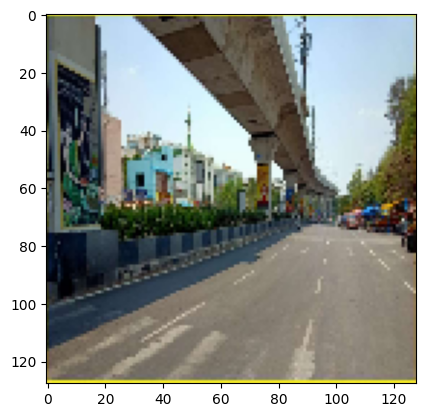

In [ ]:
plt.imshow(images[1])

The first example image is this clean street above. We will plug this into the classifier to see what objects it detects.

In [ ]:
#PROCESS IMAGE UTILITY
def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image
  #SHOW IMAGE UTILITY
def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [ ]:
#SHOW IMAGE UTILITY
def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [ ]:
demoImage = preprocess_image(images[1])
classifier = hub.load(model_handle)

input_shape = demoImage.shape
warmup_input = tf.random.uniform(input_shape, 0, 1.0)
%time warmup_logits = classifier(warmup_input).numpy()

CPU times: user 567 ms, sys: 1.18 ms, total: 569 ms
Wall time: 565 ms


In [ ]:
max_dynamic_size = 512
if model_name in model_image_size_map:
  image_size = model_image_size_map[model_name]
  dynamic_size = False
  print(f"Images will be converted to {image_size}x{image_size}")
else:
  dynamic_size = True
  print(f"Images will be capped to a max size of {max_dynamic_size}x{max_dynamic_size}")

labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]

Images will be converted to 128x128


CPU times: user 15.8 ms, sys: 17.8 ms, total: 33.6 ms
Wall time: 34.8 ms
(1)  840 - suspension bridge: 0.08165517449378967
(2)  707 - patio: 0.07770338654518127
(3)  836 - sundial: 0.04197487607598305
(4)  443 - bell cote: 0.04000386595726013
(5)  683 - obelisk: 0.03360437974333763


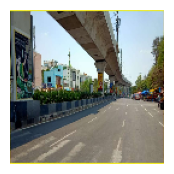

In [ ]:
# Run model on image
%time probabilities = tf.nn.softmax(classifier(demoImage)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(demoImage, '')

> Now lets see what happens when we feed it a more chaotic image, like one of the 'dirty' images that we have from our data.

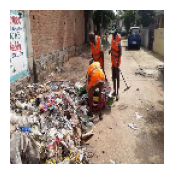

In [ ]:
demoImage = preprocess_image(images[120])
show_image(demoImage, '')

CPU times: user 13.6 ms, sys: 64 µs, total: 13.6 ms
Wall time: 12.3 ms
(1)  666 - moped: 0.39420193433761597
(2)  492 - chain saw: 0.10857512056827545
(3)  831 - stretcher: 0.09726106375455856
(4)  671 - motor scooter: 0.051124174147844315
(5)  803 - snowmobile: 0.02552846632897854


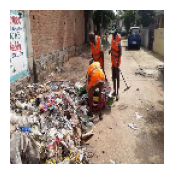

In [ ]:
# Run model on image
%time probabilities = tf.nn.softmax(classifier(demoImage)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(demoImage, '')

In [ ]:
model_name = "mobilenetv2-035-128"

#NOTICE HOW WE ARE USING FEATURE VECTOR FOR THIS STEP AND NOT CLASSIFIER
model_handle_map = {
  "mobilenetv2-035-128": "/kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 128)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 4

Selected model: mobilenetv2-035-128 : /kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2
Input size (128, 128)


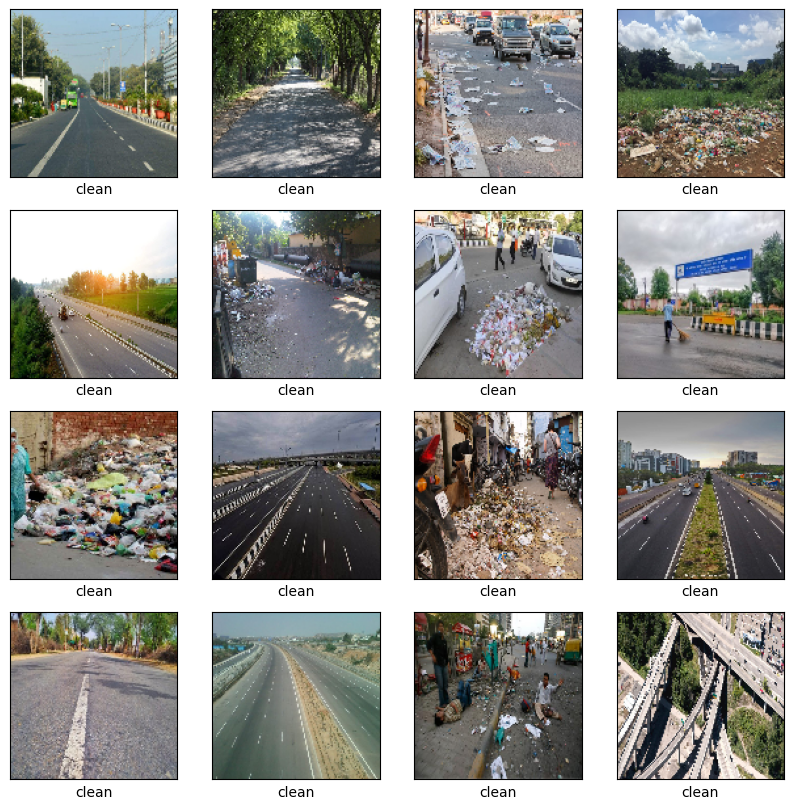

In [ ]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

In [ ]:
images_path = '/kaggle/input/cleandirty-road-classification/Images/Images/'

labels_df = pd.read_csv('/kaggle/input/cleandirty-road-classification/metadata.csv')
print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[image[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)


<ipython-input-63-4f51dc0ae29e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
<ipython-input-63-4f51dc0ae29e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1



labels shape: (237, 2)
images shape: (237, 128, 128, 3)


In [ ]:
# DEFINE TRAIN/TEST SPLIT
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (213, 128, 128, 3)
train labels shape: (213, 2)

validation images shape: (24, 128, 128, 3)
validation labels shape: (24, 2)



In [ ]:
# ImageDataGenerator for train images
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_images_generator = train_images_generator.flow(X_train, y=y_train)

# ImageDataGenerator for validation images
validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                              horizontal_flip=True)
validation_images_generator = validation_images_generator.flow(X_val, y=y_val)

In [ ]:
# Modify the output layer to have 2 units (for two classes)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer for two classes, use 'softmax' activation for multi-class classification
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with 'categorical_crossentropy' for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model (assuming one-hot encoded labels)
fit_model = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4596 - loss: 858.9507 - val_accuracy: 0.5833 - val_loss: 42.8832
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 647ms/step - accuracy: 0.5737 - loss: 45.9888 - val_accuracy: 0.4583 - val_loss: 1.5959
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 920ms/step - accuracy: 0.6657 - loss: 2.1450 - val_accuracy: 0.7500 - val_loss: 0.5429
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 684ms/step - accuracy: 0.8316 - loss: 0.3374 - val_accuracy: 0.6667 - val_loss: 0.5248
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 851ms/step - accuracy: 0.8827 - loss: 0.2611 - val_accuracy: 0.7500 - val_loss: 0.7136
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 799ms/step - accuracy: 0.9729 - loss: 0.1263 - val_accuracy: 0.7917 - val_loss: 0.7656
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 692ms/step - accuracy: 0.9563 - loss: 0.1632 - val_accuracy: 0.7500 - val_loss: 0.8937
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9846 - loss: 0.0784 - val_accuracy: 0.7083 - val_loss: 1.1992
Ep

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
    # First Conv2D layer with 32 filters, (3, 3) kernel size, ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # Changed input shape to (128, 128, 3)
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Pooling layer to reduce dimensions
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Second Conv2D layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Pooling layer
    tf.keras.layers.Flatten(),  # Flatten the 2D output into 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    tf.keras.layers.Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer for two classes with softmax for multi-class
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model using categorical_crossentropy for multi-class
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model architecture summary
model.summary()

# Assuming X_train and y_train are your training data and labels
fit_model = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)  # Assuming X_val and y_val are validation data
)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 982ms/step - accuracy: 0.4544 - loss: 273.1396 - val_accuracy: 0.5833 - val_loss: 22.3725
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 978ms/step - accuracy: 0.6753 - loss: 12.0124 - val_accuracy: 0.7083 - val_loss: 1.2928
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 667ms/step - accuracy: 0.8717 - loss: 0.3343 - val_accuracy: 0.5417 - val_loss: 1.0495
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 937ms/step - accuracy: 0.9504 - loss: 0.2013 - val_accuracy: 0.6667 - val_loss: 1.4556
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 678ms/step - accuracy: 0.9666 - loss: 0.0875 - val_accuracy: 0.6667 - val_loss: 1.1920
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 875ms/step - accuracy: 0.9889 - loss: 0.0688 - val_accuracy: 0.6667 - val_loss: 1.6034
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 726ms/step - accuracy: 0.9583 - loss: 0.0990 - val_accuracy: 0.6250 - val_loss: 1.3386
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 675ms/step - accuracy: 0.9932 - loss: 0.0274 - val_accuracy: 0.7500 - va

In [ ]:
# Access the history object returned by model.fit()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Print the accuracy from the last epoch
print("Overall Accuracy:", history.history['accuracy'][-1])

# or

print("Overall val_accuracy:", history.history['val_accuracy'][-1])


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 0.9755 - loss: 0.0506 - val_accuracy: 0.7083 - val_loss: 1.1753
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 799ms/step - accuracy: 0.9848 - loss: 0.0442 - val_accuracy: 0.6250 - val_loss: 1.3774
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 826ms/step - accuracy: 0.9948 - loss: 0.0261 - val_accuracy: 0.4583 - val_loss: 2.3847
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 671ms/step - accuracy: 0.9964 - loss: 0.0177 - val_accuracy: 0.5000 - val_loss: 1.8203
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 899ms/step - accuracy: 0.9982 - loss: 0.0100 - val_accuracy: 0.6250 - val_loss: 1.5387
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.9982 - loss: 0.0143 - val_accuracy: 0.6667 - val_loss: 1.7877
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 822ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.5833 - val_loss: 2.5704
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.6667 - val_loss

In [ ]:
print(y_train[:5])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}.keras') # Added .keras extension

In [ ]:
images_path = '/kaggle/input/cleandirty-road-classification/Images/Images/'

labels_df = pd.read_csv('/kaggle/input/cleandirty-road-classification/metadata.csv')
print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[image[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)


<ipython-input-89-79958e979466>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
<ipython-input-89-79958e979466>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1



labels shape: (237, 2)
images shape: (237, 128, 128, 3)


## Compile and Train Model

In [ ]:
# Ensure these paths point to the directories containing your training and validation images
train_dir = '/kaggle/input/cleandirty-road-classification/Images/Images'
validation_dir = '/kaggle/input/cleandirty-road-classification/Images/Images'

# Create ImageDataGenerators with data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    shear_range=0.2,  # Add shear
    zoom_range=0.2,  # Add zoom
    horizontal_flip=True,  # Add horizontal flip
    fill_mode='nearest'  # Fill mode for new pixels
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators (ensure class_mode matches your data)
train_images_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'  # Use 'binary' for two classes
)

validation_images_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'  # Use 'binary' for two classes
)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model (use binary_crossentropy for two classes)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_callback = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Calculate steps per epoch and validation steps
steps_per_epoch = train_images_generator.samples // train_images_generator.batch_size
validation_steps = validation_images_generator.samples // validation_images_generator.batch_size

# Check if steps_per_epoch and validation_steps are greater than 0
if steps_per_epoch > 0 and validation_steps > 0:
    # Train the model
    hist = model.fit(
        train_images_generator,
        epochs=20,
        verbose=1,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_images_generator,
        validation_steps=validation_steps,)

else:
    print("Invalid steps_per_epoch or validation_steps. Skipping training.")


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Invalid steps_per_epoch or validation_steps. Skipping training.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> In just 10-20 epochs we already have about 90% accuracy

[](http://)

In [ ]:
accuracy = history.history['accuracy'] # Changed 'hist' to 'history'
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))


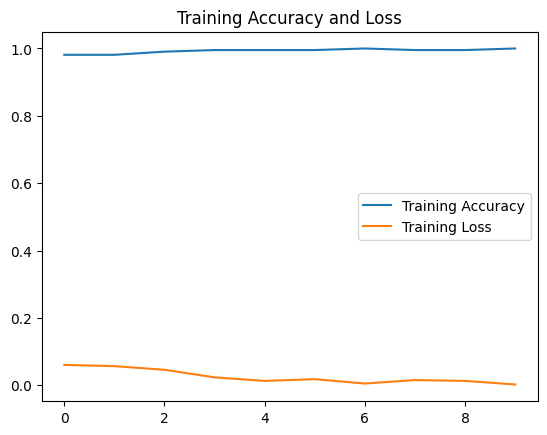

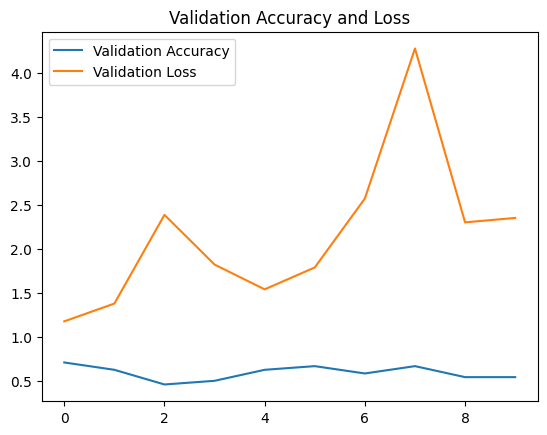

In [ ]:
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

Class Names: ('clean', 'dirty')
Number of classes: 2
Predicted Class Index: 7, True Class Index: 1
Index out of range: pred_class_index=7, true_class_index=1
Predicted Class Index: 7, True Class Index: 1
Index out of range: pred_class_index=7, true_class_index=1
Predicted Class Index: 7, True Class Index: 1
Index out of range: pred_class_index=7, true_class_index=1
Predicted Class Index: 7, True Class Index: 0
Index out of range: pred_class_index=7, true_class_index=0
Predicted Class Index: 7, True Class Index: 0
Index out of range: pred_class_index=7, true_class_index=0
Predicted Class Index: 7, True Class Index: 0
Index out of range: pred_class_index=7, true_class_index=0
Predicted Class Index: 7, True Class Index: 0
Index out of range: pred_class_index=7, true_class_index=0
Predicted Class Index: 7, True Class Index: 1
Index out of range: pred_class_index=7, true_class_index=1
Predicted Class Index: 7, True Class Index: 1
Index out of range: pred_class_index=7, true_class_index=1
Pr

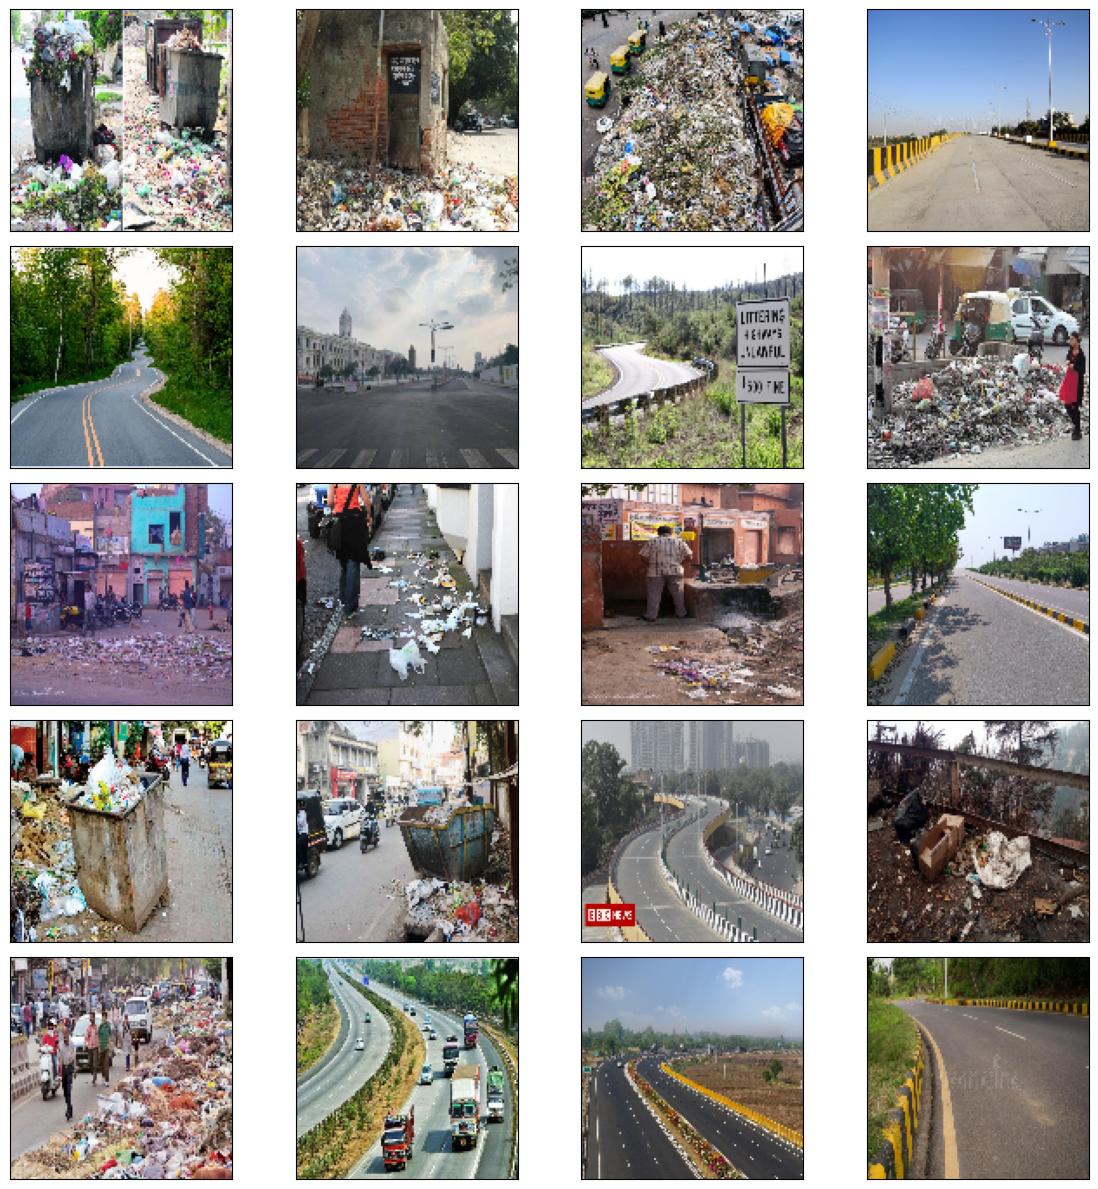

In [ ]:
# Debugging: Print class names and number of classes
print("Class Names:", class_names)
print("Number of classes:", len(class_names))

# Resize the validation data to match the input shape of the model
X_val_resized = tf.image.resize(X_val, (64, 64))

# Set up the figure and axes for a 5x4 grid
fig, axs = plt.subplots(5, 4, figsize=(12, 12))

# Counter for iterating through validation data
i = 0

for x in range(5):  # Loop through 5 rows
    for y in range(4):  # Loop through 4 columns
        # Predict the label for a single image
        input_image = X_val_resized[i].numpy().reshape(1, *model.input_shape[1:])  # Reshape after resizing
        prediction = model.predict(input_image, verbose=0)[0]  # Predict using the reshaped input

        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])

        # Debugging: Print the predicted and actual labels
        pred_class_index = np.argmax(prediction)
        true_class_index = np.argmax(y_val[i])
        print(f'Predicted Class Index: {pred_class_index}, True Class Index: {true_class_index}')

        # Compare predicted label with actual label
        if pred_class_index >= len(class_names) or true_class_index >= len(class_names):
            print(f"Index out of range: pred_class_index={pred_class_index}, true_class_index={true_class_index}")
        else:
            if pred_class_index != true_class_index:
                axs[x][y].set_xlabel(f'Prediction: {class_names[pred_class_index]} | Label: {class_names[true_class_index]}', color='red')
            else:
                axs[x][y].set_xlabel(f'Prediction: {class_names[pred_class_index]} | Label: {class_names[true_class_index]}')

        # Display the resized image in the grid
        axs[x][y].imshow(X_val[i])

        i += 1

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# DEFINE TRAIN/TEST SPLIT
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (213, 128, 128, 3)
train labels shape: (213, 2)

validation images shape: (24, 128, 128, 3)
validation labels shape: (24, 2)



In [ ]:
# ImageDataGenerator for train images
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_images_generator = train_images_generator.flow(X_train, y=y_train)

# ImageDataGenerator for validation images
validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                              horizontal_flip=True)
validation_images_generator = validation_images_generator.flow(X_val, y=y_val)

In [ ]:
# ImageDataGenerator for train images
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_images_generator = train_images_generator.flow(X_train, y=y_train)

# ImageDataGenerator for validation images
validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                              horizontal_flip=True)
validation_images_generator = validation_images_generator.flow(X_val, y=y_val)

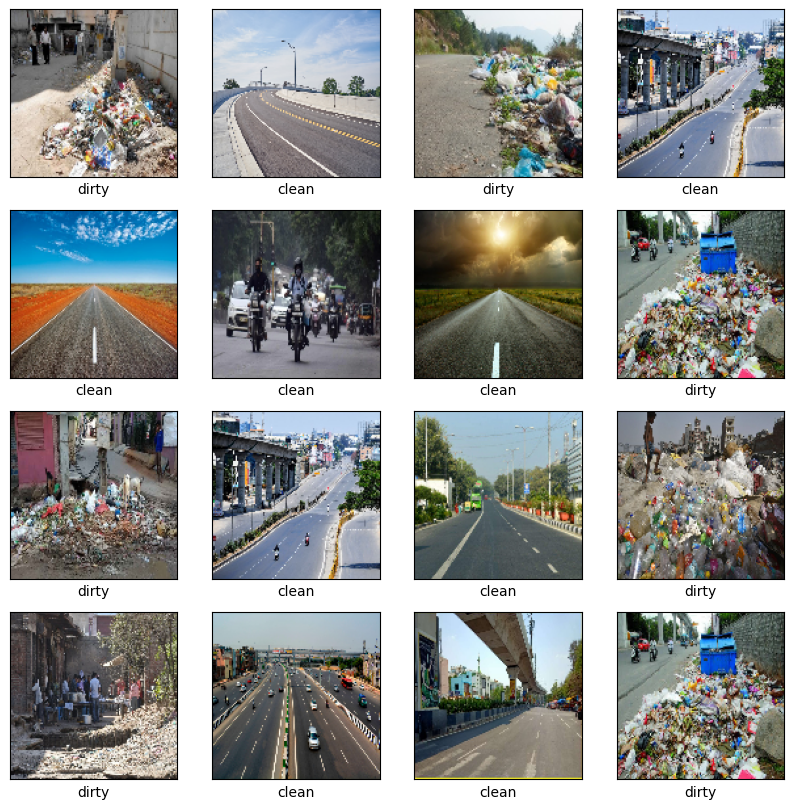

In [ ]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

# Sources

- https://www.kaggle.com/code/crn4tww/clean-dirty-road-classification-accuracy-100
- https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification
- https://www.kaggle.com/code/paultimothymooney/mobilenetv2-with-tensorflow